# Trabajo practico III - Visión por computadora I

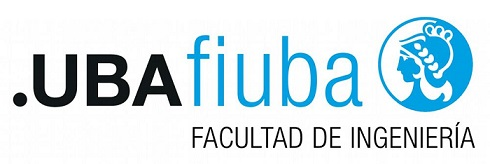

El objetivo de este trabajo práctico es aplicar los concpetos vistos en la clase 4 de la materia visión por computadora I de la Especialización en IA de la FIUBA

El trabajo práctico consta de 3 partes. Primero cargaremos las libreriás necesarias para trabajar y luego se detalla cada parte y punto a analizar y trabajar, junto a sus conclusiones

## Cargamos las librerias necesarias

In [1]:
!pip install imutils

In [2]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import os
from imutils.object_detection import non_max_suppression

## Consignas:

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs / images a partir del template Material_TPs / template
1. Obtener una detección del logo en cada imagen sin falsos positivos
2. Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi png con el mismo témplate del item 2
3. Generalizar el algoritmo del item 2 para todas las imágenes

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección

#### 1. Cargamos la imagen del template, la preprocesamos y la mostramos

In [3]:
template = cv.imread('template/pattern.png', cv.IMREAD_GRAYSCALE)
#Hago un preprocesamiento básico para mejorar la detección
template = 255 - template
template[template>100]=255
print("Tamaño de template: ", template.shape)

Tamaño de template:  (175, 400)


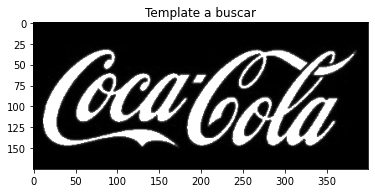

In [4]:
plt.figure(1,figsize=(6,6))
plt.imshow(template,cmap='gray')
plt.title('Template a buscar')
plt.show()

#### 1.1 Aplicamos canny a la imagen del template y la mostramos

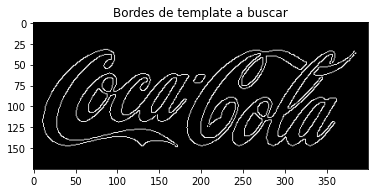

In [5]:
edges_template = cv.Canny(template, 220, 260, apertureSize = 3)
plt.figure(1,figsize=(6,6))
plt.imshow(edges_template,cmap='gray')
plt.title('Bordes de template a buscar')
plt.show()

#### 2. Cargamos las imagenes sobre las cuales buscar el template, preprocesamos y vemos sus tamaños

Cantidad de imagenes a analizar:  7 

Imagen  COCA-COLA-LOGO.jpg
Tamaño de imagen:  (1389, 1389)


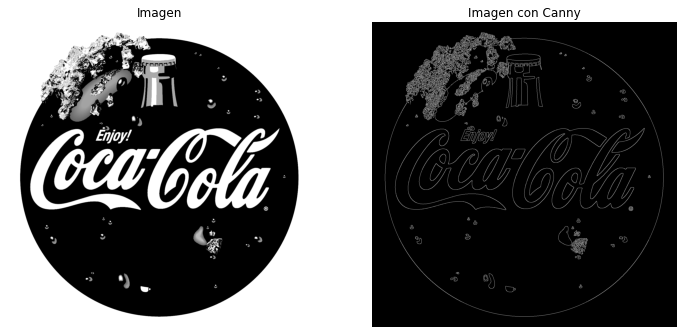



Imagen  coca_logo_1.png
Tamaño de imagen:  (500, 207)


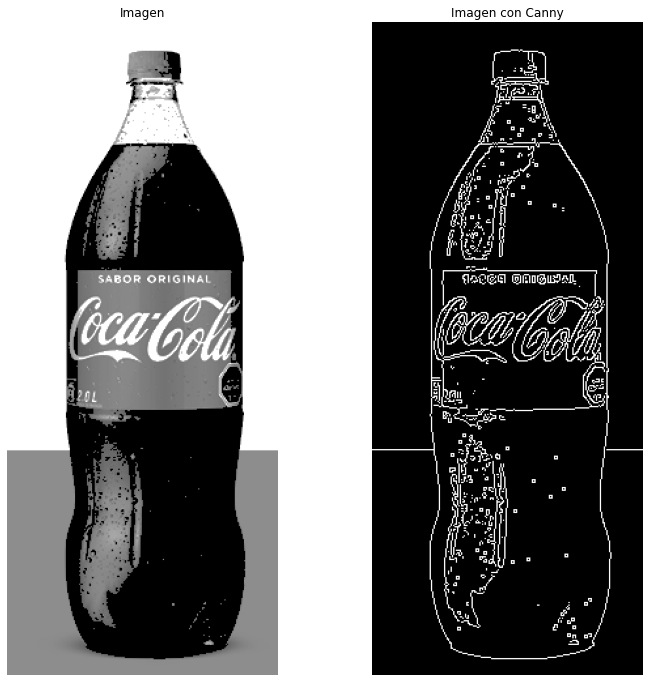



Imagen  coca_logo_2.png
Tamaño de imagen:  (363, 233)


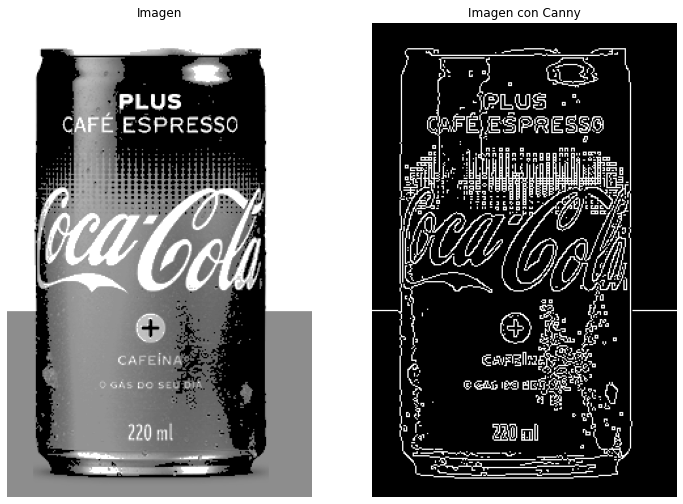



Imagen  coca_multi.png
Tamaño de imagen:  (598, 799)


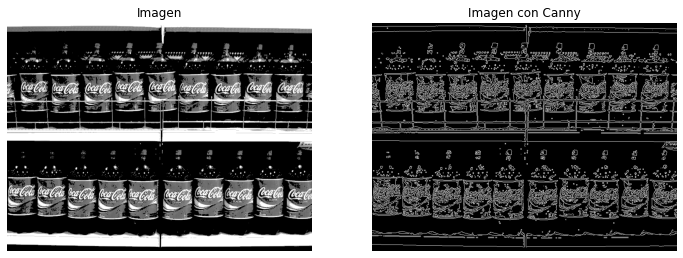



Imagen  coca_retro_1.png
Tamaño de imagen:  (493, 715)


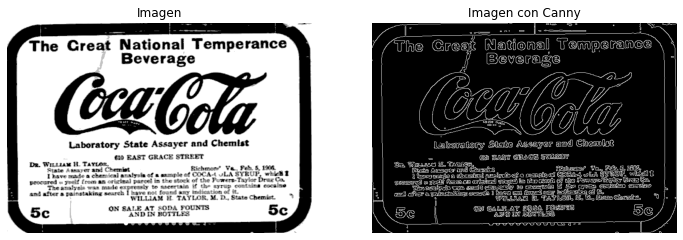



Imagen  coca_retro_2.png
Tamaño de imagen:  (429, 715)


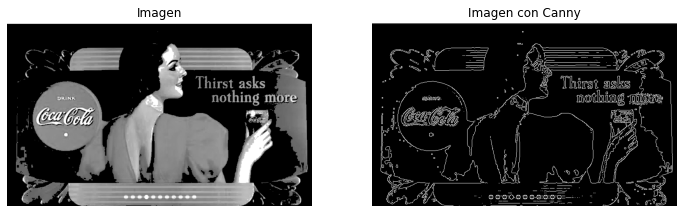



Imagen  logo_1.png
Tamaño de imagen:  (450, 687)


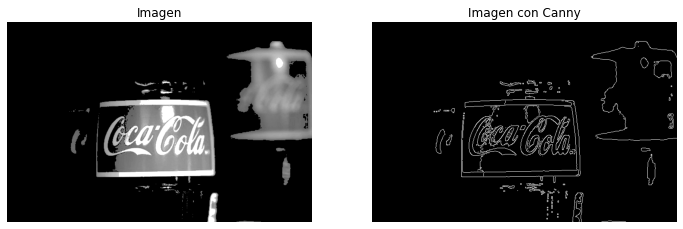

In [6]:
path_base = './images'
imagenes_rutas  = os.listdir(path_base)
print("Cantidad de imagenes a analizar: ",len(imagenes_rutas),"\n")
for img_name in imagenes_rutas:
    #1- Cargo la imagen
    img = cv.imread(path_base+"/"+img_name, cv.IMREAD_GRAYSCALE)
    #Hago un preprocesamiento básico para mejorar la detección
    img[img>200]=255
    img[img<100]=0
    print("Imagen ",img_name)
    print("Tamaño de imagen: ", img.shape)   
    
    img_canny = cv.Canny(img, 120, 120, apertureSize =3)
    
    #plt.figure(1,figsize=(6,6))
    #plt.imshow(img,cmap='gray')
    #plt.title('Imagen')
    plt.figure(figsize=(12,12))
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title("Imagen")
    plt.imshow(img,cmap='gray')
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title("Imagen con Canny")
    plt.imshow(img_canny,cmap='gray')
    plt.show()    
    print("\n") 


#### 3. Generamos nuestro primer algoritmo de template matching

In [7]:
def detectarLogo(template_in:np.ndarray,imagen:np.ndarray):
    '''
    Hacemos template matching por coeficiente de correlación
    Primero achicamos el template si es que el mismo es más grande que la imagen, hasta que su tamaño sea menor
    Luego iteramos hasta encontrar un match, sea el que sea, con un máximo de 10 iteraciones. En cada iteración
    si no encontramos el template, lo achicamos utilizando pirámides y comparamos nuevamente
    '''
    template = template_in.copy()
    w, h = template.shape[::-1]
    img_salida = imagen.copy()
    method = cv.TM_CCOEFF_NORMED
    #Achico template si es mas grande que la imagen
    while img.shape[0] <= template.shape[0] or img.shape[1] <= template.shape[1]:
            template = cv.pyrDown(template) # Achico el template

    res = cv.matchTemplate(imagen, template, method)    

    max_iteraciones = 10
    encontre = False
    iteracion = 0
    while iteracion< max_iteraciones and not(encontre):
        iteracion += 1
        print("iteracion: ",iteracion)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
    
        # Marcamos el lugar donde lo haya encontrado
        #----------------------------------------
        bottom_right = (top_left[0] + w, top_left[1] + h)
        if top_left[0]>0 and top_left[1]>0:
            encontre = True
            cv.rectangle(img_salida,top_left, bottom_right, 255, 2)

            # Graficamos el procesamiento y la salida
            #----------------------------------------
            plt.figure()

            # Resultado de coincidencia
            plt.subplot(121),plt.imshow(res,cmap = 'gray')
            plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

            # Imagen original con recuadros
            plt.subplot(122),plt.imshow(img_salida,cmap = 'gray')
            plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
            plt.show()    
        
        else:
            # Pruebo chicar el template 
            template = cv.pyrDown(template)
            

#### 3.1 Probamos la primera versión del algoritmo

iteracion:  1


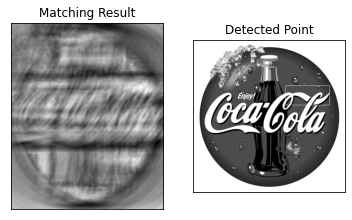

iteracion:  1


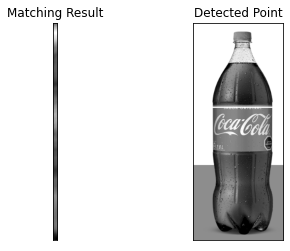

iteracion:  1


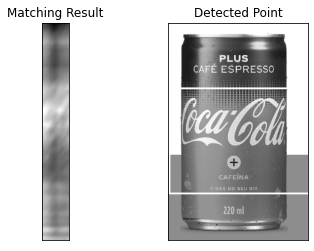

iteracion:  1


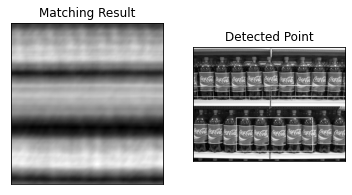

iteracion:  1


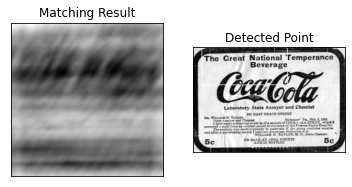

iteracion:  1


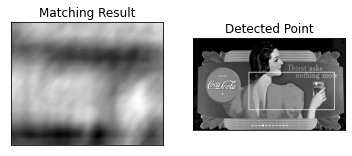

iteracion:  1


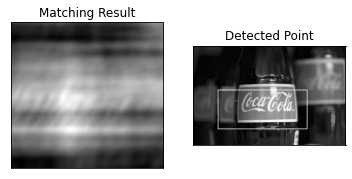

In [8]:
for img_name in imagenes_rutas:
    img = cv.imread(path_base+"/"+img_name, cv.IMREAD_GRAYSCALE)
    detectarLogo(template,img)

Vemos que los resultados no son buenos. Probamos contra la imagen pre-procesada con Canny

#### 3.2 Probamos la primera versión del algoritmo preprocesando con Canny

iteracion:  1


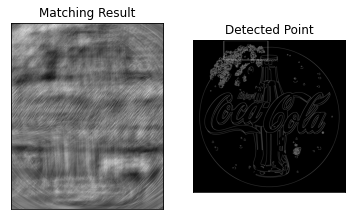

iteracion:  1


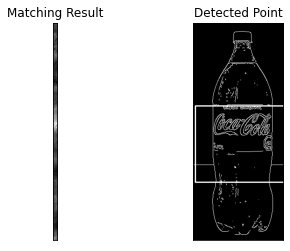

iteracion:  1


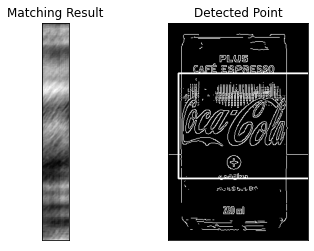

iteracion:  1


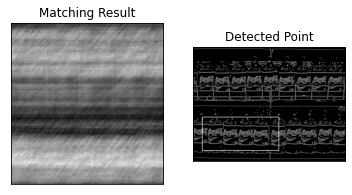

iteracion:  1


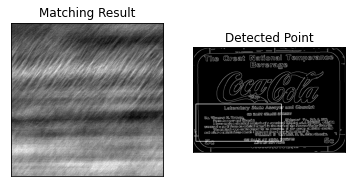

iteracion:  1


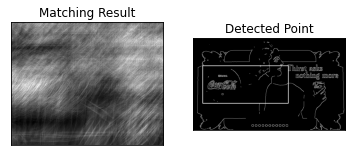

iteracion:  1


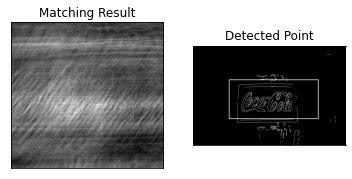

In [9]:
for img_name in imagenes_rutas:
    img = cv.imread(path_base+"/"+img_name, cv.IMREAD_GRAYSCALE)
    img_canny = cv.Canny(img, 220, 260, apertureSize = 3)
    detectarLogo(edges_template,img_canny)

Vemos que mejora la deteccion pero solo para algunos casos

#### 4. Generamos nuestro segundo algoritmo de template matching

In [10]:
def detectarLogo2(template_in:np.ndarray,imagen:np.ndarray,max_iteraciones = 10,method = cv.TM_SQDIFF_NORMED,canny=False):
    '''
    Esta función permite hacer template matching tomando diferentes parámetros de entrada.
    template_in: la imagen de template 
    imagen: la imagen sobre la cual hacer el matching
    max_iteraciones: cantidad máxima de iteraciones sobre el algoritmo.
    method: metodo a aplicar para determinar el matching
    canny: booleano que permite hacer el matching sobre la imagen original (False) o sobre la imagen luego de procesar con canny (True)
    
    Para hacer el template matching primero achicamos el template si es que el mismo es más grande que la imagen,
    hasta que su tamaño sea menor.
    Luego iteramos segun la cantidad de iteraciones definidas. En cada iteracion el template se achica a la mitad utilizando
    pirámides.
    
    En cada iteración se hace el template matching.
    Si el score obtenido es mejor que en el paso anterior se guarda la imagen de match y la imagen con el box del template matching
    en una variable auxiliar.
    Luego de todas las iteraciones se muestra el mejor match y score obtenido
    '''
    
    if canny:
        template_in = cv.Canny(template_in, 240, 240, apertureSize = 5)#220, 260,
        imagen = cv.Canny(imagen, 240, 240, apertureSize = 5)
    
    template = template_in.copy()
    w, h = template.shape[::-1]
    img_salida = imagen.copy()
    
    #Achico template si es mas grande que la imagen
    while img.shape[0] <= template.shape[0] or img.shape[1] <= template.shape[1]:
            template = cv.pyrDown(template) # Achico el template

    res = cv.matchTemplate(imagen, template, method)    
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        mejor_score = 100
    else:
        mejor_score = 0
    cambio_score = False
    iteracion = 0
    while iteracion< max_iteraciones:
        iteracion += 1
        cambio_score = False
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
            score = min_val
            if score < mejor_score:
                mejor_score = score
                cambio_score = True
        else:
            top_left = max_loc
            score = max_val
            if score > mejor_score:
                mejor_score = score
                cambio_score = True            
        
        if cambio_score:
            # Marcamos el lugar donde lo haya encontrado
            bottom_right = (top_left[0] + w, top_left[1] + h)
            img_salida = imagen.copy()
            cv.rectangle(img_salida,top_left, bottom_right, 255, 4)
            res_salida = res.copy()
        
        # Pruebo chicar el template . Antes agrandando la imagen
        template = cv.pyrDown(template)#img_salida = cv.pyrUp(img_salida)
            
    # Graficamos el procesamiento y la salida
    #----------------------------------------
    plt.figure()

    # Resultado de coincidencia
    plt.subplot(121),plt.imshow(res_salida,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(img_salida,cmap = 'gray')#cv.cvtColor(img_salida, cv.COLOR_GRAY2RGB))#imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    titulo = "Mejor score obtenido : "+str(mejor_score)
    plt.suptitle(titulo)
    plt.show()    
            

#### 4.1 Probamos nuestro segundo algoritmo de template matching contra las imagenes

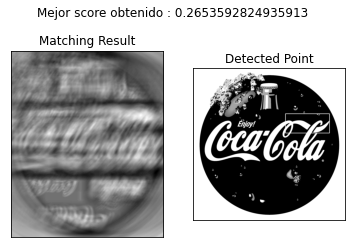

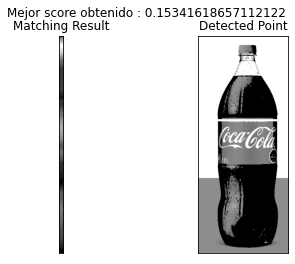

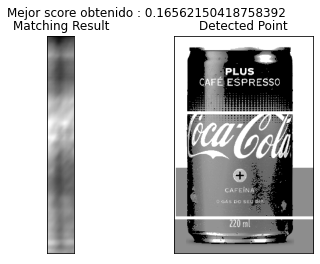

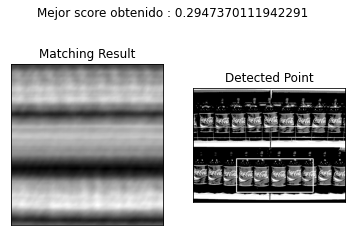

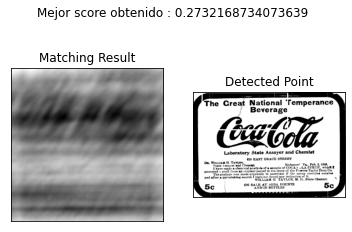

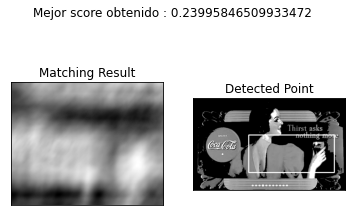

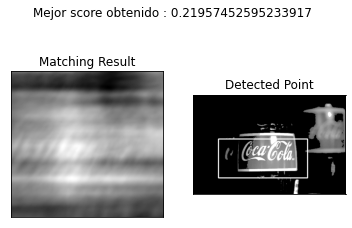

In [11]:
for img_name in imagenes_rutas:
    img = cv.imread(path_base+"/"+img_name, cv.IMREAD_GRAYSCALE)
    img[img>200]=255
    img[img<100]=0
    detectarLogo2(template,img,max_iteraciones=3,method=cv.TM_CCOEFF_NORMED,canny=False)


#### 4.2 Probamos nuestro segundo algoritmo de template matching contra las imagenes preprocesadas con canny

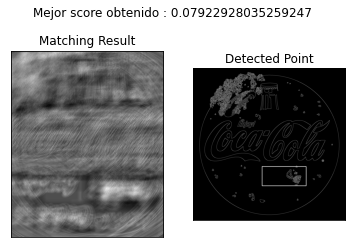

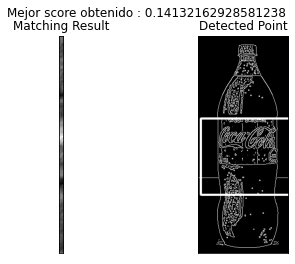

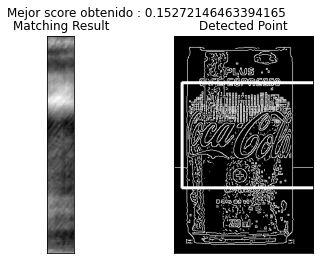

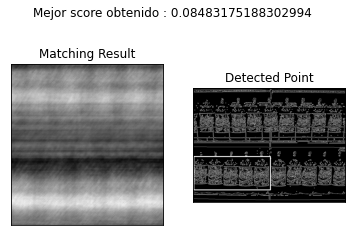

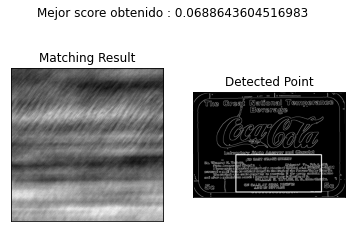

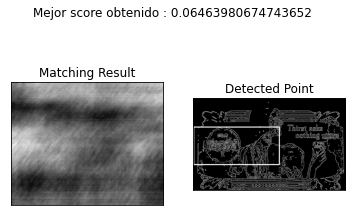

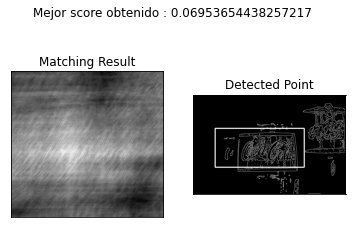

In [12]:
for img_name in imagenes_rutas:
    img = cv.imread(path_base+"/"+img_name, cv.IMREAD_GRAYSCALE)
    img[img>200]=255
    img[img<100]=0
    detectarLogo2(edges_template,img,max_iteraciones=3,method=cv.TM_CCOEFF_NORMED,canny=True)

Con este algoritmo se mejoró la detección, pero un par de imagenes no pueden detectarse

#### 4. Generamos un algoritmo para hacer template matching de múltiples imágenes y que nos sirva para el caso de imagenes simples también

In [13]:
def deteccion_multiple(img_nomb="coca_multi.png",thresh = 0.4, max_iteraciones = 10,method=cv.TM_CCOEFF_NORMED,proc_canny=False,achicaTemplate=True):
    
    '''
    Esta función permite hacer template matching tomando diferentes parámetros de entrada.
    img_nomb: nombre de la imagen sobre la cual hacer el matching
    thresh: threshold de decision para hacer el maching
    max_iteraciones: cantidad máxima de iteraciones sobre el algoritmo.
    method: metodo a aplicar para determinar el matching
    proc_canny: booleano que permite hacer el matching sobre la imagen original (False) o sobre la imagen luego de procesar con canny (True)
    achicaTemplate: booleano que indica si achicar o agrandar el template. Para el caso que el template sea mas chico que la imagen lo 
    agrando en lugar de chicarlo en cada iteracion
    
    Para hacer el template matching primero achicamos el template si es que el mismo es más grande que la imagen,
    hasta que su tamaño sea menor.
    Luego iteramos segun la cantidad de iteraciones definidas. En cada iteracion el template se achica a la mitad utilizando
    pirámides (o se agranda si se usa la opcion achicaTemplate=False)
    
    En cada iteración se hace el template matching según el threshold definido.
    Luego se analizan todos los puntos que entran en el threshold y con non_max_suppression nos quedamos con los boxes
    Mostramos la imagen con los boxes generados e iteramos nuevamente hasta terminar
    '''
    
    img = cv.imread(path_base+"/"+img_nomb)
    temp = cv.imread('template/pattern.png')
    
  
    img_gray = cv.cvtColor(img, 
                            cv.COLOR_BGR2GRAY)
    temp_gray = cv.cvtColor(temp,
                             cv.COLOR_BGR2GRAY)
    
    temp_gray[temp_gray<128] = 0
    temp_gray[temp_gray>128] = 255
    H,W  = temp_gray.shape[:2]
    img_gray = 255 - img_gray
    img_gray[img_gray>100] = 255
    
    #plt.figure(1,figsize=(8,8))
    #plt.imshow(temp_gray,cmap='gray')
    #plt.title('Template a buscar')
    #plt.show()    
    #plt.figure(1,figsize=(10,10))
    #plt.imshow(img_gray,cmap='gray')
    #plt.title('Imagen')
    #plt.show()     
    
    #Achico template si es mas grande que la imagen
    while img_gray.shape[0] <= temp_gray.shape[0] or img_gray.shape[1] <= temp_gray.shape[1]:
            temp_gray = cv.pyrDown(temp_gray) # Achico el template    
    
    if proc_canny:
        temp_gray = cv.Canny(temp_gray, 220, 260, apertureSize = 3)
        img_gray = cv.Canny(img_gray, 220, 260, apertureSize = 3)
    
    encontre = False
    iteracion = 0
    while iteracion< max_iteraciones:
        iteracion += 1
        match = cv.matchTemplate(image=img_gray, templ=temp_gray,method=method)
        cv.normalize( match, match, 0, 1, cv.NORM_MINMAX, -1 )
        
        # Selecciono rectangulos con valor mejor que el threshold
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            (y_points, x_points) = np.where((match >= thresh) & (match < 0.95))
        else:
             (y_points, x_points) = np.where((match <= thresh) & (match >= 0.05))
            
        # Armo lista de boxes
        boxes = list()
        for (x, y) in zip(x_points, y_points):

            # Agrego cada box a la lista
            boxes.append((x, y, x + W, y + H))
    
        if len(boxes) > 0:
            encontre = True
            # Aplico non_max_suppression
            boxes = non_max_suppression(np.array(boxes),overlapThresh=0.35)
            # Hago loop sobre los boxes
            for (x1, y1, x2, y2) in boxes:

                # Y dibujo el rectangulo
                cv.rectangle(img, (x1, y1), (x2, y2),
                              (255, 0, 0), 3)

            # Muestro el template y la imagen con los matchs
            cv.imshow("Template", temp)
            cv.imshow("After NMS", img)
            #cv.imshow("Imagen match", match)
            cv.waitKey(0)

            # destroy all the windows 
            # manually to be on the safe side
            cv.destroyAllWindows()
        if proc_canny:
            temp_gray = cv.Canny(temp_gray, 220, 260, apertureSize = 3)
        if achicaTemplate:
            temp_gray = cv.pyrDown(temp_gray) # Achico el template
        else:
            temp_gray = cv.pyrUp(temp_gray) # Agrando el template
            # Si me paso corto las iteraciones
            if img_gray.shape[0] <= temp_gray.shape[0] or img_gray.shape[1] <= temp_gray.shape[1]:
                iteracion = max_iteraciones
                
        H,W = temp_gray.shape[:2]

#### 4.1 Hacemos pruebas de deteccion multiple y con las imagenes individuales

In [14]:
deteccion_multiple(thresh = 0.15, max_iteraciones =2,method=cv.TM_CCOEFF_NORMED,proc_canny=True)

In [15]:
deteccion_multiple(thresh = 0.1, max_iteraciones = 3,method=cv.TM_CCOEFF_NORMED,proc_canny=False)

In [16]:
deteccion_multiple(thresh = 0.85, max_iteraciones = 2,method=cv.TM_SQDIFF_NORMED,proc_canny=False)

In [17]:
deteccion_multiple(thresh = 0.6, max_iteraciones = 1,method=cv.TM_CCOEFF_NORMED,proc_canny=True)
deteccion_multiple(thresh = 0.3, max_iteraciones = 1,method=cv.TM_CCOEFF_NORMED,proc_canny=True)
#deteccion_multiple(thresh = 0.2, max_iteraciones = 2,method=cv.TM_CCOEFF_NORMED)

In [18]:
deteccion_multiple(img_nomb="coca_retro_1.png",thresh = 0.11, max_iteraciones = 1,method=cv.TM_CCOEFF_NORMED)

In [19]:
deteccion_multiple(img_nomb="coca_logo_2.png",thresh = 0.24, max_iteraciones = 1,method=cv.TM_CCOEFF_NORMED)

In [20]:
deteccion_multiple(img_nomb="coca_logo_1.png",thresh =0.85, max_iteraciones = 1,method=cv.TM_SQDIFF_NORMED,proc_canny=False)

In [21]:
deteccion_multiple(img_nomb="logo_1.png",thresh =0.83, max_iteraciones = 1,method=cv.TM_SQDIFF_NORMED,proc_canny=False)

In [22]:
deteccion_multiple(img_nomb="coca_retro_2.png",thresh = 0.2, max_iteraciones = 1,method=cv.TM_CCOEFF_NORMED,proc_canny=True)
deteccion_multiple(img_nomb="coca_retro_2.png",thresh = 0.3, max_iteraciones = 1,method=cv.TM_CCOEFF_NORMED,proc_canny=False)

In [23]:
deteccion_multiple(img_nomb="COCA-COLA-LOGO.jpg",thresh = 0.08, max_iteraciones = 3,method=cv.TM_CCOEFF_NORMED,achicaTemplate=False)

#### 5. Probamos un algoritmo nuevo con la estrategia de agrandar la imagen y no reducir el template

In [32]:
def deteccion_multiple_solo(thresh = 0.4, agrandar = 1,method=cv.TM_CCOEFF_NORMED,proc_canny=False):
    
    '''
    Esta función permite hacer template matching tomando diferentes parámetros de entrada.
    img_nomb: nombre de la imagen sobre la cual hacer el matching
    thresh: threshold de decision para hacer el maching
    agrandar: cuantas veces agrando la imagen
    method: metodo a aplicar para determinar el matching
    proc_canny: booleano que permite hacer el matching sobre la imagen original (False) o sobre la imagen luego de procesar con canny (True)
    
    Para hacer el template matching primero agrando la imagen segun cantidad de veces en agrandar.
    
    Se hace el template matching según el threshold definido.
    Luego se analizan todos los puntos que entran en el threshold y con non_max_suppression nos quedamos con los boxes
    Mostramos la imagen con los boxes generados.
    '''
    
    img = cv.imread(path_base+"/"+"coca_multi.png")
    temp = cv.imread('template/pattern.png')
    img_gray = cv.cvtColor(img, 
                            cv.COLOR_BGR2GRAY)
    temp_gray = cv.cvtColor(temp,
                             cv.COLOR_BGR2GRAY)
    
    temp_gray[temp_gray<128] = 0
    temp_gray[temp_gray>128] = 255
    H,W  = temp_gray.shape[:2]
    img_gray = 255 - img_gray
    img_gray[img_gray>100] = 255
    img_gray[img_gray<100] = 0
    
    for i in range(agrandar):    
        img_gray = cv.pyrUp(img_gray)
    
    print("Tamaño de template nuevo: ", temp_gray.shape)
    print("Tamaño de imagen nuevo: ", img_gray.shape)

    plt.figure(1,figsize=(8,8))
    plt.imshow(temp_gray,cmap='gray')
    plt.title('Template a buscar')
    plt.show()    
    plt.figure(1,figsize=(10,10))
    plt.imshow(img_gray,cmap='gray')
    plt.title('Imagen')
    plt.show() 
    
    if proc_canny:
        temp_gray = cv.Canny(temp_gray, 220, 260, apertureSize = 3)
        img_gray = cv.Canny(img_gray, 120, 120, apertureSize = 3)
        plt.figure(1,figsize=(8,8))
        plt.imshow(temp_gray,cmap='gray')
        plt.title('Template a buscar con canny')
        plt.show()    
        plt.figure(1,figsize=(10,10))
        plt.imshow(img_gray,cmap='gray')
        plt.title('Imagen con canny')
        plt.show()         
    
    encontre = False
    match = cv.matchTemplate(image=img_gray, templ=temp_gray,method=method)
    cv.normalize( match, match, 0, 1, cv.NORM_MINMAX, -1 )
        
    # Selecciono rectangulos con valor mejor que el threshold
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        (y_points, x_points) = np.where((match >= thresh) & (match < 0.95))
    else:
        (y_points, x_points) = np.where((match <= thresh) & (match >= 0.05))
            
    # Armo lista de boxes
    boxes = list()
    for (x, y) in zip(x_points, y_points):

        # Agrego cada box a la lista
        boxes.append((x, y, x + W, y + H))
    
    if len(boxes) > 0:
        encontre = True
        # Aplico non_max_suppression
        boxes = non_max_suppression(np.array(boxes),overlapThresh=0.35)
        # Hago loop sobre los boxes
        for (x1, y1, x2, y2) in boxes:

            # Y dibujo el rectangulo
            cv.rectangle(img, (x1, y1), (x2, y2),
                          (255, 0, 0), 3)

        # Muestro el template y la imagen con los matchs
        cv.imshow("Template", temp)
        cv.imshow("After NMS", img)
        #cv.imshow("Imagen match", match)
        cv.waitKey(0)

        # destroy all the windows 
        # manually to be on the safe side
        cv.destroyAllWindows()
    

#### 5.1. Hacemos algunas pruebas

Tamaño de template nuevo:  (175, 400)
Tamaño de imagen nuevo:  (2392, 3196)


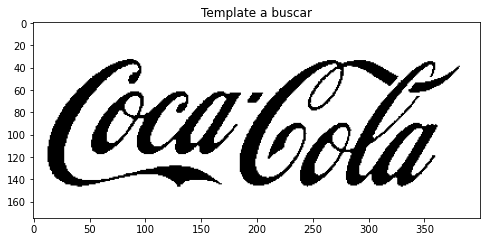

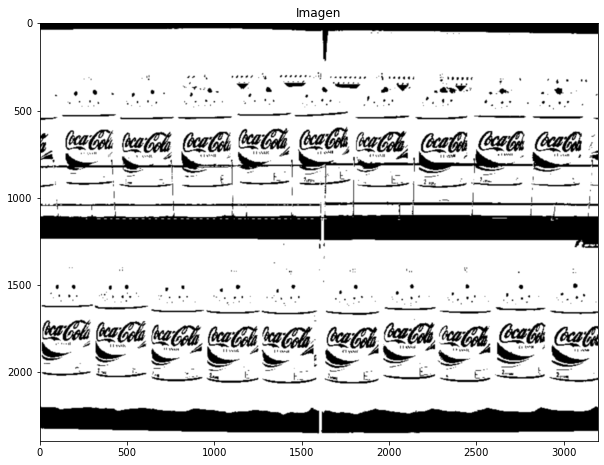

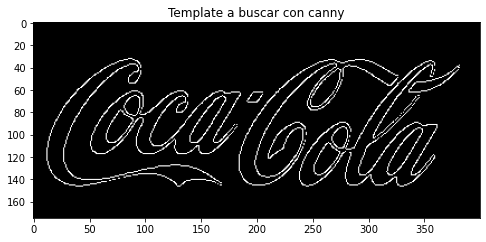

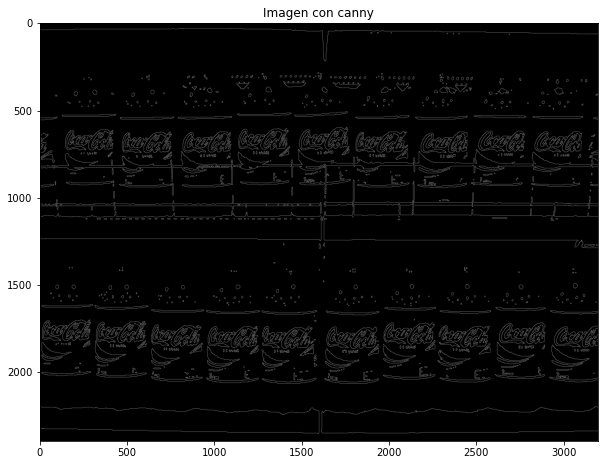

In [33]:
deteccion_multiple_solo(thresh = 0.3, agrandar = 2,method=cv.TM_CCOEFF_NORMED,proc_canny=True)

itero
itero
Tamaño de template nuevo:  (175, 400)
Tamaño de imagen nuevo:  (2392, 3196)


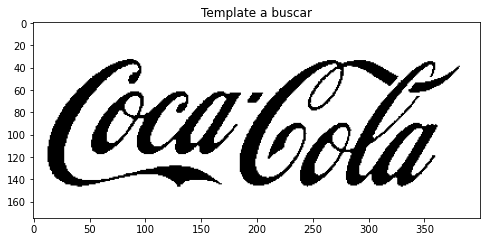

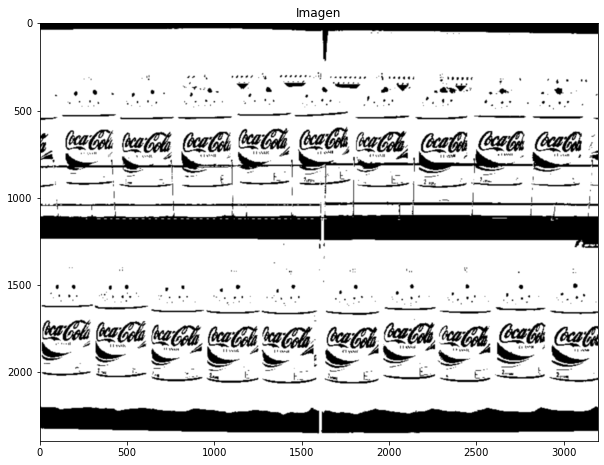

In [27]:
deteccion_multiple_solo(thresh = 0.2, agrandar = 2,method=cv.TM_CCOEFF_NORMED,proc_canny=False)